# How to get started with CDC Text Corpora for learners

This notebook provides examples on how to get started with the CDC Text Corpora or Harvest CDC journals datasets. These resources are useful for learning natural language processing or for research using academic papers in public health. The datasets contain articles from CDC's three online journals in the public domain series: MMWR, EID, and PCD.

- [_Morbidity and Mortality Weekly Report_](https://www.cdc.gov/mmwr/) (_MMWR_)
  - 4 series available in HTML 1982-2023 (volumes 31-72)
- [_Emerging Infectious Diseases_](https://wwwnc.cdc.gov/eid) (_EID_)
  - Available in HTML 1995-2023 (volumes 1-29)
- [_Preventing Chronic Disease_](https://www.cdc.gov/pcd/) (_PCD_)
  - Available in HTML 2004-2023 (volumes 1-20)

These three collections contain 33,567 HTML documents spanning 42 years.

In this notebook, we will cover how to explore the corpus using the metadata dataframe,
examine one collection through data extraction, and perform exploratory data analysis.

* Exploring the Corpus

    * Collection Trends: Count by Year

* Exploring One Collection: PCD

    * Extracting a Paragraph

    * Extracting Section Headers

    * Extracting All Section Information

    * Exploratory Data Analysis

        * Clean and Tokenize

        * Including Additional Features: Text Length, Word Count, Sentiment

        * Plot Histogram: Word Count and Sentiment

        * Plot Top N-grams

Please note: This notebook is a work in progress and will be updated regularly. 
Feel free to use this work as inspiration and build upon it.

In [9]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, inaugural
import json

## Exploring the Corpus

In [129]:
CORPUS_METADATA = '../csv-output/cdc_corpus_df.csv'
corpus_df = pd.read_csv(CORPUS_METADATA,low_memory=False)
corpus_df.head()

,url,collection,series,level,lang,dl_year_mo,dl_vol_iss,dl_date,dl_page,dl_art_num,...,base,string,link_canon,md_citation_doi,title,md_citation_categories,dl_cat,md_kwds,md_desc,md_citation_author
0,https://www.cdc.gov/mmwr/preview/index82.html,mmwr_toc_en,mmwr,volume,en,1982,31,1982,NaN,NaN,...,https://www.cdc.gov/mmwr/mmwr_wk/wk_pvol.html,Volume 31 (1982),NaN,NaN,CDC - MMWR - MMWR Publications - MMWR Weekly: ...,NaN,NaN,NaN,NaN,NaN
1,https://www.cdc.gov/mmwr/preview/index83.html,mmwr_toc_en,mmwr,volume,en,1983,32,1983,NaN,NaN,...,https://www.cdc.gov/mmwr/mmwr_wk/wk_pvol.html,Volume 32 (1983),NaN,NaN,CDC - MMWR - MMWR Publications - MMWR Weekly: ...,NaN,NaN,NaN,NaN,NaN
2,https://www.cdc.gov/mmwr/preview/index84.html,mmwr_toc_en,mmwr,volume,en,1984,33,1984,NaN,NaN,...,https://www.cdc.gov/mmwr/mmwr_wk/wk_pvol.html,Volume 33 (1984),NaN,NaN,CDC - MMWR - MMWR Publications - MMWR Weekly: ...,NaN,NaN,NaN,NaN,NaN
3,https://www.cdc.gov/mmwr/preview/index85.html,mmwr_toc_en,mmwr,volume,en,1985,34,1985,NaN,NaN,...,https://www.cdc.gov/mmwr/mmwr_wk/wk_pvol.html,Volume 34 (1985),NaN,NaN,CDC - MMWR - MMWR Publications - MMWR Weekly: ...,NaN,NaN,NaN,NaN,NaN
4,https://www.cdc.gov/mmwr/preview/index86.html,mmwr_toc_en,mmwr,volume,en,1986,35,1986,NaN,NaN,...,https://www.cdc.gov/mmwr/mmwr_wk/wk_pvol.html,Volume 35 (1986),NaN,NaN,CDC - MMWR - MMWR Publications - MMWR Weekly: ...,NaN,NaN,NaN,NaN,NaN


In [130]:
corpus_df.columns

Index(['url', 'collection', 'series', 'level', 'lang', 'dl_year_mo',
       'dl_vol_iss', 'dl_date', 'dl_page', 'dl_art_num', 'dateline', 'base',
       'string', 'link_canon', 'md_citation_doi', 'title',
       'md_citation_categories', 'dl_cat', 'md_kwds', 'md_desc',
       'md_citation_author'],
      dtype='object')

In [131]:
corpus_df.shape

(33567, 21)

In [132]:
corpus_df.isna().sum()

url                           0
collection                    0
series                        0
level                         0
lang                          0
dl_year_mo                    0
dl_vol_iss                    0
dl_date                   13184
dl_page                    5821
dl_art_num                28508
dateline                      0
base                          0
string                        0
link_canon                16043
md_citation_doi           15587
title                       304
md_citation_categories    28951
dl_cat                    32203
md_kwds                   16059
md_desc                   29395
md_citation_author        16813
dtype: int64

In [133]:
corpus_df['collection'].value_counts()

eid_art_en     12769
mmwr_art_en    12692
pcd_art_en      3011
mmnd_art_en     1195
pcd_art_es      1011
mmrr_art_en      551
mmss_art_en      467
pcd_art_fr       357
pcd_art_zht      356
pcd_art_zhs      356
eid_toc_en       330
mmsu_art_en      234
pcd_toc_en        49
mmwr_toc_en       42
pcd_toc_es        36
mmss_toc_en       36
mmrr_toc_en       34
mmwr_art_es       22
mmsu_toc_en       19
Name: collection, dtype: int64

In [134]:
corpus_df['lang'].value_counts()

en     31429
es      1069
fr       357
zhs      356
zht      356
Name: lang, dtype: int64

In [135]:
corpus_df['series'].value_counts()

eid     13099
mmwr    12753
pcd      5176
mmnd     1195
mmrr      586
mmss      503
mmsu      255
Name: series, dtype: int64

In [136]:
corpus_df['level'].value_counts()

article    33021
issue        301
volume       245
Name: level, dtype: int64

In [137]:
corpus_df['dl_year_mo']

0           1982
1           1983
2           1984
3           1985
4           1986
          ...   
33562    2009-01
33563    2009-01
33564    2009-01
33565    2009-01
33566    2010-01
Name: dl_year_mo, Length: 33567, dtype: object

In [138]:
from datetime import datetime
def _convert_to_dateformat(x):
    str_dt = ''
    if len(x)==4:
        str_dt = x +'-01-01'
    else:
        str_dt = x+'-01'
    date_format = '%Y-%m-%d'

    date_obj = datetime.strptime(str_dt, date_format)   
    return date_obj

In [139]:
corpus_df['dl_year_mo_dy'] = corpus_df['dl_year_mo'].apply(lambda s :_convert_to_dateformat(s))
corpus_df['dl_year'] = corpus_df['dl_year_mo_dy'].dt.year


### Collection Trends : Count by Year

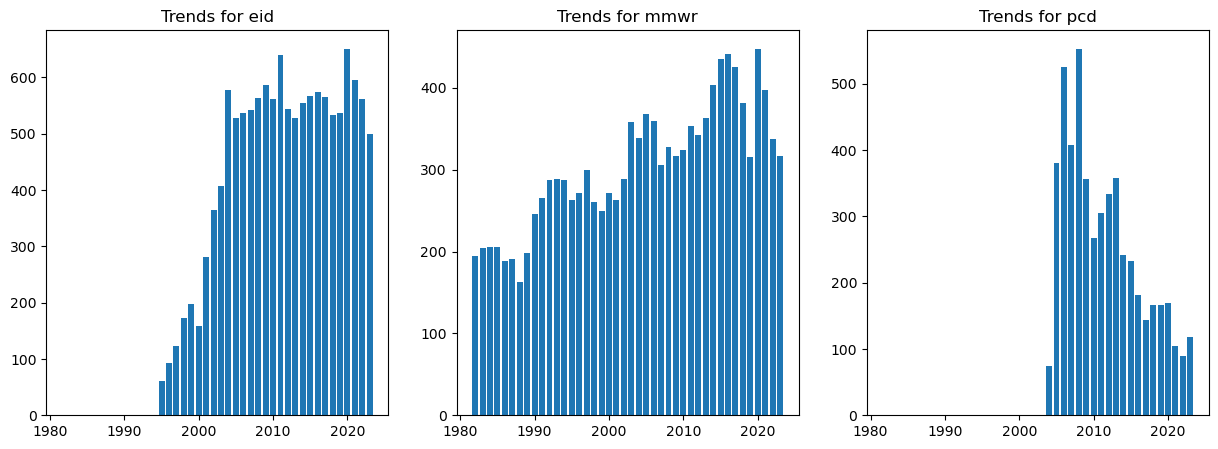

In [140]:
df = corpus_df[['url','dl_year','series']] \
                    .groupby(['series','dl_year']) \
                    .count()
df_freq = pd.crosstab(index=corpus_df["dl_year"], 
                             columns=[corpus_df["series"]],
                             margins=False)
plt.figure(figsize=(15,5))
for i,series in enumerate(['eid','mmwr','pcd']):
    plt.subplot(1,3,i+1)
    plt.bar(df_freq.index,df_freq[series])
    plt.title(f"Trends for {series}")
plt.show()

In [141]:
corpus_df[['lang','series','title']].groupby(['lang','series']).count()
corpus_freq = pd.crosstab(index=corpus_df["lang"], 
                             columns=[corpus_df["series"]],
                             margins=True)
corpus_freq

series,eid,mmnd,mmrr,mmss,mmsu,mmwr,pcd,All
lang,,,,,,,,
en,13099,1195,585,503,253,12734,3060,31429
es,0,0,1,0,2,19,1047,1069
fr,0,0,0,0,0,0,357,357
zhs,0,0,0,0,0,0,356,356
zht,0,0,0,0,0,0,356,356
All,13099,1195,586,503,255,12753,5176,33567


In [142]:
corpus_freq = pd.crosstab(index=corpus_df["series"], 
                             columns=[corpus_df["lang"],corpus_df["level"]],
                             margins=True)
corpus_freq.T

series          eid  mmnd  mmrr  mmss  mmsu   mmwr   pcd    All
lang level                                                     
en   article  12769  1195   551   467   234  12692  3011  30919
     issue      301     0     0     0     0      0     0    301
     volume      29     0    34    36    19     42    49    209
es   article      0     0     1     0     2     19  1011   1033
     volume       0     0     0     0     0      0    36     36
fr   article      0     0     0     0     0      0   357    357
zhs  article      0     0     0     0     0      0   356    356
zht  article      0     0     0     0     0      0   356    356
All           13099  1195   586   503   255  12753  5176  33567

## Exploring One Collection : PCD

In [167]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayerantoine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mayerantoine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [168]:
#PCD_FILE = 'pcd_art_en_txt.zip'
#!unzip '../json-outputs/txt/pcd_art_en_txt.zip'

In [169]:
all_files = [s for s in os.listdir('../json-outputs/html') if s.find("art_en_html")>0 ]
os.makedirs("data", exist_ok=True)

In [170]:
import os
cwd = os.getcwd()
cwd

'/Users/mayerantoine/Code/harvest-cdc-journals/examples'

In [171]:
from zipfile import ZipFile

for file in all_files:
    zipd = os.path.join("../json-outputs/html",file)
    with ZipFile(zipd,'r') as zipObject:
        ZipFile.extractall(zipObject,os.path.join(cwd,"./data"))

In [172]:
import json

with open('./data/pcd_art_en_html.json') as f :
    pcd_art_en = json.load(f)
f.close()

In [173]:
json_files = [s for s in os.listdir('./data') ]
json_files

['pcd_art_en_html.json',
 'mmrr_art_en_html.json',
 'mmwr_art_en_html.json',
 'mmss_art_en_html.json',
 'mmsu_art_en_html.json',
 'mmnd_art_en_html.json']

In [174]:
pcd_art_en['https://www.cdc.gov/pcd/issues/2012/11_0080.htm']

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><!-- InstanceBegin template="/Templates/ContentPage_Wide.dwt" codeOutsideHTMLIsLocked="false" -->\n<head>\n<!-- InstanceParam name="id" type="text" value="undefined" --><!-- InstanceParam name="class" type="text" value="widePage" --><!-- InstanceParam name="content" type="boolean" value="true" --><!-- InstanceParam name="optionSpanish" type="boolean" value="false" --><!-- InstanceParam name="optionalFeatures" type="boolean" value="false" --><!-- InstanceParam name="optionalBreadCrumbs" type="boolean" value="false" --><!-- InstanceParam name="OptionalLocalSearch" type="boolean" value="true" --><!-- InstanceParam name="OptionalLocalA-Z" type="boolean" value="false" --><!-- InstanceParam name="optionalExtra" type="boolean" value="false" --><!-- InstanceParam name="JqueryUI" type="boolean" value="false

In [175]:
from bs4 import BeautifulSoup as bs
example = pcd_art_en['https://www.cdc.gov/pcd/issues/2012/11_0080.htm']
soup = bs(example, features="html.parser")

#### Extracting a Paragraph

In [176]:
def paragraphs(d, strip_new=True, min_length=50):
    """Saves text information from a file."""
    d_soup = bs(d, features="html.parser")
    out = [p.text for p in d_soup.find_all('p')]
    if strip_new:
        out = [par.replace('\n', '') for par in out]
        out = [par for par in out if len(par) >= min_length]
    return out

In [177]:
paragraphs(example)

['This page was updated on January 19, 2012, to incorporate thecorrections in Vol. 9',
 'Suggested citation for this article: Drach LL, Morris D, Cushing C, Romoli C, Harris RL. Promoting smoke-free environments and tobacco cessation in residential treatment facilities for mental health and addictions, Oregon, 2010.[Erratum appears in Prev Chronic Dis 2012;9.http://www.cdc.gov/pcd/issues/2012/12_0052.htm.] Prev Chronic Dis 2012;9:110080. DOI:  http://dx.doi.org/10.5888/pcd9.110080.',
 'We assessed tobacco-related policies and procedures at all state-funded,community-based residential mental health and substance addiction treatmentfacilities before implementation of new state policy requirements. We conductedtelephone interviews with 162 of 166 (98%) facility administrators. Only 15% hadvoluntarily implemented 100% smoke-free campus policies, and 47% offeredcessation resources at patient discharge; however, less than 10% expressedopposition to these future requirements. Smoking bans and

#### Extracting Section Headers

In [178]:
def list_headers(s):
    """Lists the sections of a content template."""
    h2s = s.find_all('h2')
    headers = [h.text for h in h2s]
   
    header_dict = dict(zip(headers,np.arange(len(headers))))
    return headers ,header_dict

In [179]:
list_headers(soup)

(['Abstract',
  'Objective',
  'Methods',
  'Results',
  'Discussion',
  'Acknowledgments',
  'Author Information',
  'References'],
 {'Abstract': 0,
  'Objective': 1,
  'Methods': 2,
  'Results': 3,
  'Discussion': 4,
  'Acknowledgments': 5,
  'Author Information': 6,
  'References': 7})

In [180]:
examples =[ pcd_art_en['https://www.cdc.gov/pcd/issues/2012/11_0080.htm'],
            pcd_art_en['https://www.cdc.gov/pcd/issues/2004/jan/cover.htm'],
            pcd_art_en['https://www.cdc.gov/pcd/issues/2004/oct/04_0092.htm']]


In [181]:
def get_content(example):
    detailText = []
    soup = bs(example, features="html.parser")
    list_headers = [h.get_text().strip() for h in soup.find_all("h2")]
    
    if 'Abstract' not in list_headers:

        content = " ".join(paragraphs(example))  
        return content

    for header in soup.find_all("h2"):
        section = header.get_text().strip()
        if section in ['Acknowledgments','References','Author Information', 'Abstract']:
            continue
        
        nextNode = header
        while True:
            nextNode = nextNode.nextSibling
            if not nextNode:
                break
            if nextNode.name == "h2":
                detailText.append(nextNode.get_text().strip().replace("\n"," "))
                break
            #print(nextNode.name, nextNode.get_text().strip())
            detailText.append(nextNode.get_text().strip().replace("\n"," "))
    
    clean_Text= [s for s in detailText if s not in ('','Top','Back to top')]
    content = " ".join(clean_Text)  

    return content  

In [182]:
from pprint import pprint
x = pcd_art_en['https://www.cdc.gov/pcd/issues/2004/jan/cover.htm']
c = get_content(x)
pprint(c)

('For our first year, Preventing Chronic Disease will use originalworks '
 'suggestive of folk art for our covers, as a reminder of whom we serve '
 'through our research and programs. Fundamentally, public health is '
 'aboutpeople; their health, their communities, their cultures, and the '
 'privilegesand disadvantages that affect their well-being. The image for our '
 "inaugural issue emphasizes the individual's connectionto a larger cultural "
 'heritage. The African American woman holds a strikingpose suggesting '
 'multiple interpretations — celebration, power, fluidness— within a specific '
 'ethnic tradition. The light shining behind her bodyand the rich red '
 "background color illustrate strength and courage in facinglife's challenges. "
 'The opinions expressed by authors contributing to thisjournal do not '
 'necessarily reflect the opinions of the U.S. Department of Healthand Human '
 'Services, the Public Health Service, the Centers for Disease Control '
 'andPrevention, 

In [183]:
def get_abstract(example) :
    detailText = []
    soup = bs(example, features="html.parser")
    list_headers = [h.get_text().strip() for h in soup.find_all("h2")]

    if 'Abstract' in list_headers:
        for header in soup.find_all("h2"):
            section = header.get_text().strip()
            if section in ['Introduction','Background','Objective']:
                break
            #print(section)
            nextNode = header
            while True:
                nextNode = nextNode.nextSibling
                if not nextNode:
                    break
                if nextNode.name == "h2":
                    break
                #print(nextNode.name, nextNode.get_text().strip())
                detailText.append(nextNode.get_text().strip().replace("\n"," "))

        #abstract = " ".join(detailText[:-1])
        clean_Text= [s for s in detailText if s not in ('','Top','Back to top','Top of Page')]
        abstract = " ".join(clean_Text)
    else:
        abstract = ''
    #print(abstract)
    return abstract 

In [184]:
pprint(get_abstract(examples[0]))

('We assessed tobacco-related policies and procedures at all state-funded, '
 'community-based residential mental health and substance addiction treatment '
 'facilities before implementation of new state policy requirements. We '
 'conducted telephone interviews with 162 of 166 (98%) facility '
 'administrators. Only 15% had voluntarily implemented 100% smoke-free campus '
 'policies, and 47% offered cessation resources at patient discharge; however, '
 'less than 10% expressed opposition to these future requirements. Smoking '
 'bans and cessation support in residential treatment facilities can reduce '
 'tobacco-related disparities among people with mental illness and addictions, '
 'but states may need to be the catalyst for policy implementation.')


In [185]:
def get_title(example):
    soup = bs(example, features="html.parser")
    h1s = soup.find_all('h1')
    
    titles = [h.get_text("|").strip() for h in h1s]

    if len(titles) > 0:
        title = titles[0].split('|')[-1].strip().replace("\n"," ")
        return title
    else:
        return titles

In [186]:
pprint(get_title(examples[0]))

('Promoting Smoke-free Environments and Tobacco Cessation in Residential '
 'Treatment Facilities for Mental Health and Substance Addictions, Oregon, '
 '2010')


In [187]:
def get_authors(example):
    soup = bs(example, features="html.parser")
    h4s = soup.find_all('h4')
    #print(h4s)
    authors = [h.text for h in h4s]
    if len(authors) > 0 :
        if authors[-1]=='Exit Notification / Disclaimer Policy':
            return authors[0]
        else:
            return authors[-1]
    return authors

In [188]:
pprint(get_authors(examples[0]))

('Linda L. Drach, MPH; Daniel Morris, PhD, MS; Cathryn Cushing; Cinzia Romoli, '
 'MS; Richard L. Harris, MSW')


In [189]:
ex = pcd_art_en['https://www.cdc.gov/pcd/issues/2023/23_0182.htm']
get_authors(ex)

'Hailey Voyer, MPH1; Semra Aytur, PhD, MPH2; Nicole Tanda, MPH1 (View author affiliations)'

#### Extracting All Section Information

In [190]:
cnt = 0
pcd_abstract = {}
for key , val in pcd_art_en.items():
    abstract = get_abstract(val)
    title = get_title(val)
    authors = get_authors(val)
    content  = get_content(val)
    art = {'title':title,
           'authors':authors,
           'abstract': abstract,
           'content': content
           }
    pcd_abstract[key]=art
    cnt = cnt + 1

In [191]:
import json
with open('pcd_data.json', 'w') as f:
    json.dump(pcd_abstract, f)

### Exploratory Data Analysis

In [192]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.
    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """

    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)
    #text = re.sub(r"\'", "", text)
    text = re.sub(r"\"", "", text)

    # convert text to lowercase
    text = text.strip().lower()

    # remove all non-ASCII characters:
    text = re.sub(r'[^\x00-\x7f]', r'', text)

    # remove URL
    text = re.sub(r"http\S+", "", text)

    # replace punctuation characters with spaces
    filters = '!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = " ".join(text.split())
    return text

#### Clean and Tokenize

In [193]:
def cleaning_data(X):
    df_clean = X.apply(lambda x: re.sub(r'\d+', '', str(x)))
    return df_clean.apply(lambda x: clean_text(str(x)))

In [194]:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have",
                     "couldna": "could not have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [195]:
import string
from nltk import tokenize

useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)+['``',"''",'...','a',"--","***",'http',"**"]

def review_tokenize(text):
  return [word.lower() for word in word_tokenize(text)]


def remove_stopswords_punctuation(tokens):
  return [w.lower() for w in tokens if w not in useless_words]

def tokenize_filtered(text):
  x = re.sub(r'\d+', '', str(text))
  x = clean_text(x)
  x = expand_contractions(x)
  x = review_tokenize(x)
  x = remove_stopswords_punctuation(x)

  x = ' '.join(x)

  return x



In [196]:
# reading the JSON data using json.load()
file = 'pcd_data.json'
with open(file) as train_file:
    dict_train = json.load(train_file)

# converting json dataset from dictionary to dataframe
pcd_df = pd.DataFrame.from_dict(dict_train, orient='index')
#train.reset_index(level=0, inplace=True)
pcd_df

,title,authors,abstract,content
https://www.cdc.gov/pcd/issues/2004/jan/cover.htm,About This Image,[],,"For our first year, Preventing Chronic Disease..."
https://www.cdc.gov/pcd/issues/2004/jan/03_0010b.htm,Qualitative Assessment of Participant Utilizat...,"Lynne T. Smith, RD, PhD, MPH, Donna B. Johnson...",Introduction The Seattle Senior Farmers' Marke...,"Older adults, compared to younger adults, tend..."
https://www.cdc.gov/pcd/issues/2004/jan/03_0039b.htm,Letter from Tommy Thompson,[],,Suggested citation for this article: Letter fr...
https://www.cdc.gov/pcd/issues/2004/jan/03_0039a.htm,Letter from Julie Gerberding,[],,Suggested citation for this article: Letter fr...
https://www.cdc.gov/pcd/issues/2004/jan/03_0008.htm,Targeting Diabetes Preventive Care Programs: I...,"Martha M. Phillips, PhD, MPH, MBA",Introduction Many individuals with diabetes do...,"Annual vaccinations for influenza, lifetime va..."
...,...,...,...,...
https://www.cdc.gov/pcd/issues/2023/23_0199.htm,Disaggregation of Breastfeeding Initiation Rat...,"Kristin J. Marks, PhD, MPH1,2,3; Jasmine Y. Na...",Introduction Although breastfeeding is the ide...,Breastfeeding is the optimal source of nutriti...
https://www.cdc.gov/pcd/issues/2023/23_0155.htm,Geospatial Determinants of Food Pantry Access ...,"John Lowrey, PhD1,2; Danielle Maestas, MA2; Th...",,"Suggested citation for this article: Lowrey J,..."
https://www.cdc.gov/pcd/issues/2023/23_0182.htm,Linking Adverse Childhood Experiences and Othe...,"Hailey Voyer, MPH1; Semra Aytur, PhD, MPH2; Ni...",Introduction The Centers for Disease Control a...,"In recent years, the aging population in the U..."
https://www.cdc.gov/pcd/issues/2023/23_0198.htm,"Substance Use, Sleep Duration, and Health Amon...","Estefania Hernandez, MA1; Stephanie Griggs, Ph...",Introduction Substance use affects approximate...,Substance misuse affects approximately 46.3 mi...


In [197]:
# removing all covers article
pcd_df_final = pcd_df.loc[~pcd_df.index.str.contains('cover')]

In [198]:
%%time
pcd_df_final['clean_content'] = pcd_df_final['content'].apply(lambda x: tokenize_filtered(x))
pcd_df_final

CPU times: user 37.7 s, sys: 490 ms, total: 38.2 s
Wall time: 39.5 s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,authors,abstract,content,clean_content
https://www.cdc.gov/pcd/issues/2004/jan/03_0010b.htm,Qualitative Assessment of Participant Utilizat...,"Lynne T. Smith, RD, PhD, MPH, Donna B. Johnson...",Introduction The Seattle Senior Farmers' Marke...,"Older adults, compared to younger adults, tend...",older adults compared younger adults tend eat ...
https://www.cdc.gov/pcd/issues/2004/jan/03_0039b.htm,Letter from Tommy Thompson,[],,Suggested citation for this article: Letter fr...,suggested citation article letter fromtommy th...
https://www.cdc.gov/pcd/issues/2004/jan/03_0039a.htm,Letter from Julie Gerberding,[],,Suggested citation for this article: Letter fr...,suggested citation article letter fromjulie ge...
https://www.cdc.gov/pcd/issues/2004/jan/03_0008.htm,Targeting Diabetes Preventive Care Programs: I...,"Martha M. Phillips, PhD, MPH, MBA",Introduction Many individuals with diabetes do...,"Annual vaccinations for influenza, lifetime va...",annual vaccinations influenza lifetime vaccina...
https://www.cdc.gov/pcd/issues/2004/jan/03_0033.htm,Law as a Tool for Preventing Chronic Diseases:...,"George A. Mensah, MD, Richard A. Goodman, MD, ...","Law, which is a fundamental element of effecti...",This paper examines the potential need for and...,paper examines potential need role systematic ...
...,...,...,...,...,...
https://www.cdc.gov/pcd/issues/2023/23_0199.htm,Disaggregation of Breastfeeding Initiation Rat...,"Kristin J. Marks, PhD, MPH1,2,3; Jasmine Y. Na...",Introduction Although breastfeeding is the ide...,Breastfeeding is the optimal source of nutriti...,breastfeeding optimal source nutrition infants...
https://www.cdc.gov/pcd/issues/2023/23_0155.htm,Geospatial Determinants of Food Pantry Access ...,"John Lowrey, PhD1,2; Danielle Maestas, MA2; Th...",,"Suggested citation for this article: Lowrey J,...",suggested citation article lowrey j maestas be...
https://www.cdc.gov/pcd/issues/2023/23_0182.htm,Linking Adverse Childhood Experiences and Othe...,"Hailey Voyer, MPH1; Semra Aytur, PhD, MPH2; Ni...",Introduction The Centers for Disease Control a...,"In recent years, the aging population in the U...",recent years aging population united states in...
https://www.cdc.gov/pcd/issues/2023/23_0198.htm,"Substance Use, Sleep Duration, and Health Amon...","Estefania Hernandez, MA1; Stephanie Griggs, Ph...",Introduction Substance use affects approximate...,Substance misuse affects approximately 46.3 mi...,substance misuse affects approximately million...


#### Including Additional Features: Text Length, Word Count, Sentiment

In [199]:
import seaborn as sns
from textblob import TextBlob

pcd_df_final['text_len'] = pcd_df_final['clean_content'].str.len()
pcd_df_final['word_cnt'] = pcd_df_final['clean_content'].apply(lambda x: len(word_tokenize(x)))
pcd_df_final['polarity'] = pcd_df_final['clean_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

/var/folders/6q/63lm7tyj16q5wftrhvcn_77w0000gn/T/ipykernel_82416/2610103694.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcd_df_final['text_len'] = pcd_df_final['clean_content'].str.len()
/var/folders/6q/63lm7tyj16q5wftrhvcn_77w0000gn/T/ipykernel_82416/2610103694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcd_df_final['word_cnt'] = pcd_df_final['clean_content'].apply(lambda x: len(word_tokenize(x)))
/var/folders/6q/63lm7tyj16q5wftrhvcn_77w0000gn/T/ipykernel_82416/2610103694.py:6: SettingWith

#### Plot Histogram: Word Count and Sentiment

<AxesSubplot:xlabel='word_cnt', ylabel='Count'>

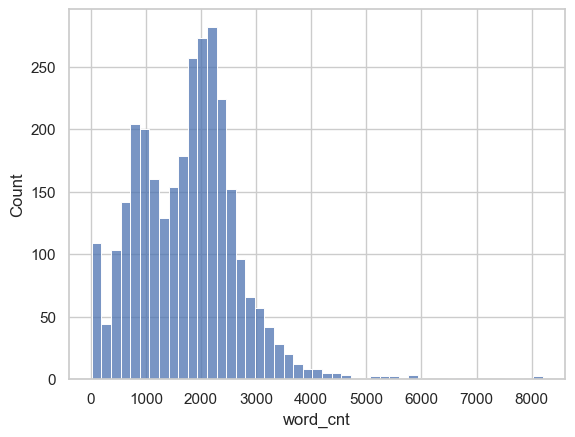

In [200]:
sns.histplot(pcd_df_final['word_cnt'])

<AxesSubplot:xlabel='polarity', ylabel='Count'>

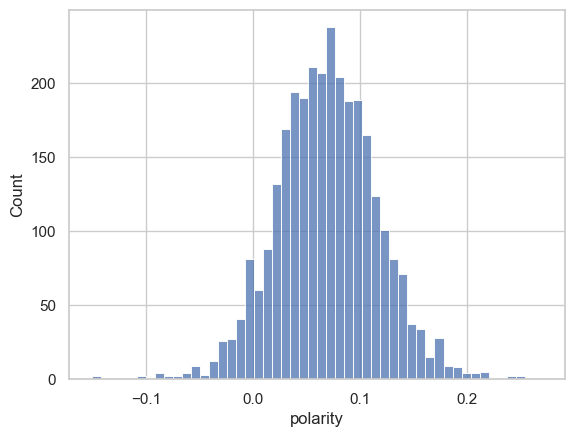

In [201]:
sns.histplot(pcd_df_final['polarity'])

#### Plot Top N-grams

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
#tokenize_filtered
def get_top_ngrams(corpus,n_gram=1):

  vectorizer = CountVectorizer(stop_words='english',ngram_range=(n_gram,n_gram)).fit(corpus['clean_content'])
  bag_of_words = vectorizer.transform(corpus['clean_content'])
  sum_words = bag_of_words.sum(axis=0)
  word_freq = [(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
  word_freq = sorted(word_freq,key= lambda x:x[1],reverse=True)

  return word_freq

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
#sns.set(rc={"figure.figsize":(10, 8)})

def plot_top_ngrams(bow,top_n=20):
  plt.figure(figsize=(6,6))
  df_word_cnt = pd.DataFrame(data=bow,columns=['word', 'cnt'])
  return sns.barplot(x='cnt',y='word',data=df_word_cnt[:top_n])

<AxesSubplot:xlabel='cnt', ylabel='word'>

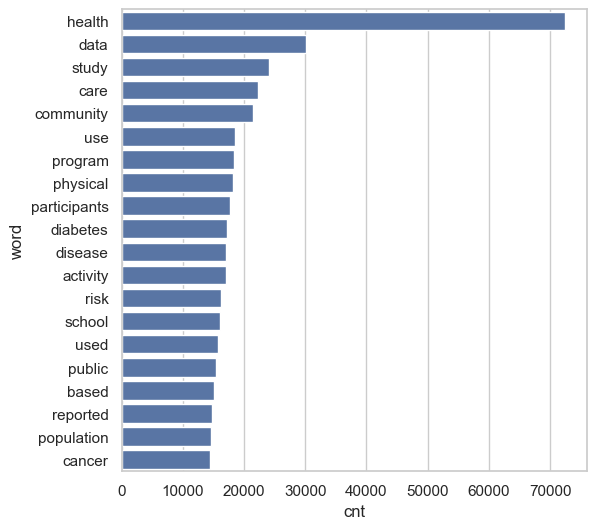

In [204]:
plot_top_ngrams(get_top_ngrams(pcd_df_final))

<AxesSubplot:xlabel='cnt', ylabel='word'>

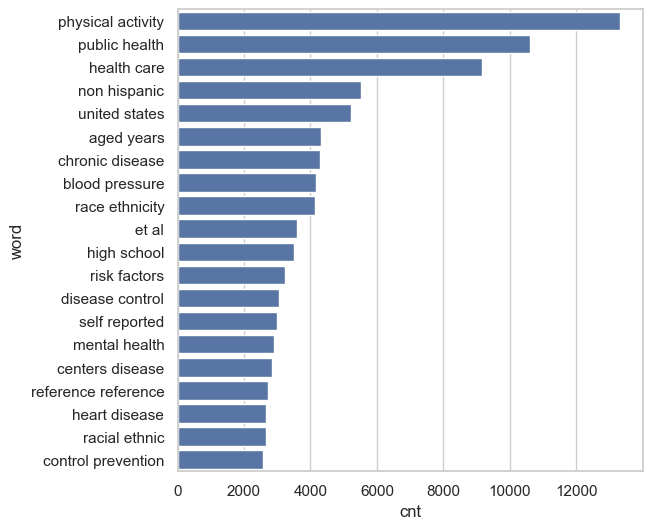

In [205]:
plot_top_ngrams(get_top_ngrams(pcd_df_final,n_gram=2))